Análisis de datos usando sparklyr
===

* *30 min* | Última modificación: Junio 22, 2019

En este tutorial se presenta el análisis de una base de datos sobre vuelos usando SQL en Spark desde la interfaz de R desarrollada por RStudio. En este documento se ejemplifica el uso de DataFrames para la realización de consultas usando sus funciones nativas, como también el envio de comandos SQL. Adicionalmente, se demuestra como salvar los resultados al HDFS en distintos formatos. 

Al finalizar este documento, el lector estará en capacidad de:

* Mover archivos entre el HDFS y el sistema local.

* Importar tablas en formato CSV a Sparklyr.

* Aplicar operadores de selección, filtrado y agregación desde R.

* Usar los resultados obtenidos para construir gráficos.

* Exportar los resultados a archivos en el sistema HDFS.

Este ejemplo está basado en el tutorial de Spark de HortoWorks, disponible en https://es.hortonworks.com/tutorial/learning-spark-sql-with-zeppelin/

En este tutorial se ejemplican los mismos comandos usados en el tutorial 'Análisis de datos usando PySpark', por lo que aquí solo se ilustra la sintaxis usada; para obtener información detallada, debe verse el tutorial citado.

## Preparación

In [1]:
##
## Esta función se usará para ejecutar comandos en el 
## sistema operativo y capturar la salida.
##
systemp <- function(command) cat(system(command, intern = TRUE), sep = '\n')

In [2]:
library(sparklyr)
library(dplyr)
sc <- spark_connect(master='local', spark_home='/home/vagrant/spark/spark-2.4.3-bin-hadoop2.7')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Copia de archivos al HDFS

In [3]:
##
## El archivo flights.csv se encuentra en la capeta de
## trabajo de la máquina local. Se copia el archivo 
## a la carpeta /tmp del sistema HDFS.
##
systemp('hdfs dfs -copyFromLocal flights.csv /tmp/')

##
## Se listan los archivos en la carpeta /tmp del HDFS
## para verificar que el archivo haya sido copiado
##
systemp('hdfs dfs -ls /tmp/*csv')

Warning message:
“running command 'hdfs dfs -copyFromLocal flights.csv /tmp/' had status 1”


-rw-r--r--   1 vagrant supergroup    9719582 2019-05-21 01:44 /tmp/flights.csv


## Carga de datos en Spark

In [4]:
##
## Crea un DataFrame a partir del archivo fligths.csv
##
flights <- spark_read_csv(sc, 
                          "flights",
                          "/tmp/flights.csv")

In [5]:
##
## Se imprime el esquema para verificar la lectura
## del archivo.
##
sdf_schema(flights)

$Year
$Year$name
[1] "Year"

$Year$type
[1] "IntegerType"


$Month
$Month$name
[1] "Month"

$Month$type
[1] "IntegerType"


$DayofMonth
$DayofMonth$name
[1] "DayofMonth"

$DayofMonth$type
[1] "IntegerType"


$DayOfWeek
$DayOfWeek$name
[1] "DayOfWeek"

$DayOfWeek$type
[1] "IntegerType"


$DepTime
$DepTime$name
[1] "DepTime"

$DepTime$type
[1] "StringType"


$CRSDepTime
$CRSDepTime$name
[1] "CRSDepTime"

$CRSDepTime$type
[1] "IntegerType"


$ArrTime
$ArrTime$name
[1] "ArrTime"

$ArrTime$type
[1] "StringType"


$CRSArrTime
$CRSArrTime$name
[1] "CRSArrTime"

$CRSArrTime$type
[1] "IntegerType"


$UniqueCarrier
$UniqueCarrier$name
[1] "UniqueCarrier"

$UniqueCarrier$type
[1] "StringType"


$FlightNum
$FlightNum$name
[1] "FlightNum"

$FlightNum$type
[1] "IntegerType"


$TailNum
$TailNum$name
[1] "TailNum"

$TailNum$type
[1] "StringType"


$ActualElapsedTime
$ActualElapsedTime$name
[1] "ActualElapsedTime"

$ActualElapsedTime$type
[1] "StringType"


$CRSElapsedTime
$CRSElapsedTime$name
[1] "CRSElapsedTime"

$CRSElapsedTime$type
[1] "IntegerType"


$AirTime
$AirTime$name
[1] "AirTime"

$AirTime$type
[1] "StringType"


$ArrDelay
$ArrDelay$name
[1] "ArrDelay"

$ArrDelay$type
[1] "StringType"


$DepDelay
$DepDelay$name
[1] "DepDelay"

$DepDelay$type
[1] "StringType"


$Origin
$Origin$name
[1] "Origin"

$Origin$type
[1] "StringType"


$Dest
$Dest$name
[1] "Dest"

$Dest$type
[1] "StringType"


$Distance
$Distance$name
[1] "Distance"

$Distance$type
[1] "IntegerType"


$TaxiIn
$TaxiIn$name
[1] "TaxiIn"

$TaxiIn$type
[1] "StringType"


$TaxiOut
$TaxiOut$name
[1] "TaxiOut"

$TaxiOut$type
[1] "StringType"


$Cancelled
$Cancelled$name
[1] "Cancelled"

$Cancelled$type
[1] "IntegerType"


$CancellationCode
$CancellationCode$name
[1] "CancellationCode"

$CancellationCode$type
[1] "StringType"


$Diverted
$Diverted$name
[1] "Diverted"

$Diverted$type
[1] "IntegerType"


$CarrierDelay
$CarrierDelay$name
[1] "CarrierDelay"

$CarrierDelay$type
[1] "StringType"


$WeatherDelay
$WeatherDelay$name
[1] "WeatherDelay"

$WeatherDelay$type
[1] "StringType"


$NASDelay
$NASDelay$name
[1] "NASDelay"

$NASDelay$type
[1] "StringType"


$SecurityDelay
$SecurityDelay$name
[1] "SecurityDelay"

$SecurityDelay$type
[1] "StringType"


$LateAircraftDelay
$LateAircraftDelay$name
[1] "LateAircraftDelay"

$LateAircraftDelay$type
[1] "StringType"

In [6]:
## 
## Se imprime un subconjunto de las columnas para verificar
## la lectura
##
head(select(flights, 'UniqueCarrier', 'FlightNum', 'DepDelay', 'ArrDelay', 'Distance'))

# Source: spark<?> [?? x 5]
  UniqueCarrier FlightNum DepDelay ArrDelay Distance
  <chr>             <int> <chr>    <chr>       <int>
1 WN                  335 8        -14           810
2 WN                 3231 19       2             810
3 WN                  448 8        14            515
4 WN                 1746 -4       -6            515
5 WN                 3920 34       34            515
6 WN                  378 25       11            688

In [7]:
##
## Usando piping:
##
head(flights %>% select('UniqueCarrier', 'FlightNum', 'DepDelay', 'ArrDelay', 'Distance'))

# Source: spark<?> [?? x 5]
  UniqueCarrier FlightNum DepDelay ArrDelay Distance
  <chr>             <int> <chr>    <chr>       <int>
1 WN                  335 8        -14           810
2 WN                 3231 19       2             810
3 WN                  448 8        14            515
4 WN                 1746 -4       -6            515
5 WN                 3920 34       34            515
6 WN                  378 25       11            688

In [8]:
##
## Número total de registros leidos
##
numTotalFlights <- collect(count(flights))$n
numTotalFlights

[1] 1e+05

In [9]:
##
## Usando piping:
##
flights %>% count()

# Source: spark<?> [?? x 1]
       n
   <dbl>
1 100000

## Cálculos usando funciones de los DataFrames

### Cómputo del porcentaje de vuelos retrasados

In [10]:
##
## La variable delayedFlights contiene las columnas 
## UniqueCarrier y DepDelay para los vuelos con 
## DepDelay > 15 minutos.
##
delayedFlights <- select(filter(flights, DepDelay > 15), c('UniqueCarrier', 'DepDelay'))
head(delayedFlights)

# Source: spark<?> [?? x 2]
  UniqueCarrier DepDelay
  <chr>         <chr>   
1 WN            19      
2 WN            34      
3 WN            25      
4 WN            67      
5 WN            94      
6 WN            27      

In [11]:
##
## Usando piping:
##
delayedFlights <- flights %>% filter(DepDelay > 15) %>% select(UniqueCarrier, DepDelay)
head(delayedFlights)

# Source: spark<?> [?? x 2]
  UniqueCarrier DepDelay
  <chr>         <chr>   
1 WN            19      
2 WN            34      
3 WN            25      
4 WN            67      
5 WN            94      
6 WN            27      

In [12]:
collect(count(delayedFlights))$n

[1] 19587

In [13]:
##
## Porcentaje de vuelos retrasados.
##
numDelayedFlights <- collect(count(delayedFlights))$n
cat("Porcentaje de vuelos retrasados: ", numDelayedFlights / numTotalFlights * 100, "%")

Porcentaje de vuelos retrasados:  19.587 %

### Creación de campos

A continuación se desea crear una nueva columna llamada `IsDelayed` que vale 0 si el vuelo se realizó a tiempo y 1 si se retraso.

In [14]:
##
## Selecciona algunos campos del DataFrame original
##
flightsWithDelays <- select(flights, c('Year', 
                                       'Month',
                                       'DayofMonth', 
                                       'UniqueCarrier', 
                                       'FlightNum', 
                                       'DepDelay'))
                                   
##
## Crea un nuevo campo, como computo de otro existente
##

flightsWithDelays <- mutate(flightsWithDelays, 
                            IsDelayed = ifelse(DepDelay > 15, 1, 0))

flightsWithDelays <- flightsWithDelays %>% na.replace(IsDelayed = 0)

##
## Se imprimen algunos registros para verificar el resultado.
##
head(select(flightsWithDelays, c('DepDelay', 'IsDelayed')))

# Source: spark<?> [?? x 2]
  DepDelay IsDelayed
  <chr>        <dbl>
1 8                0
2 19               1
3 8                0
4 -4               0
5 34               1
6 25               1

In [15]:
## 
## A continuación, se calcula el porcentaje de vuelos con retrasos
##
sum_is_delayed <- collect(flightsWithDelays %>% summarize(sum(IsDelayed)))$'sum(IsDelayed)'
count_depdelay <- collect(flightsWithDelays %>% summarize(n()))$'n()'
sum_is_delayed / count_depdelay

Warning message:
“Missing values are always removed in SQL.
Use `SUM(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”

[1] 0.19587

## Cómputos usando SQL

A continuación se realizan los mismos cálculos anteriores, pero usando SQL desde Spark.

In [16]:
## 
## Se crea la tabla
##
flights %>%   
    mutate(IsDelayed = ifelse(DepDelay > 15, 1, 0)) %>% 
    na.replace(0) %>%
    sdf_register('flights_mutated')

# Source: spark<flights_mutated> [?? x 30]
    Year Month DayofMonth DayOfWeek DepTime CRSDepTime ArrTime CRSArrTime
   <int> <int>      <int>     <int> <chr>        <int> <chr>        <int>
 1  2008     1          3         4 2003          1955 2211          2225
 2  2008     1          3         4 754            735 1002          1000
 3  2008     1          3         4 628            620 804            750
 4  2008     1          3         4 926            930 1054          1100
 5  2008     1          3         4 1829          1755 1959          1925
 6  2008     1          3         4 1940          1915 2121          2110
 7  2008     1          3         4 1937          1830 2037          1940
 8  2008     1          3         4 1039          1040 1132          1150
 9  2008     1          3         4 617            615 652            650
10  2008     1          3         4 1620          1620 1639          1655
# … with more rows, and 22 more variables: UniqueCarrier <chr>,
#   F

In [17]:
dplyr::src_tbls(sc)

[1] "flights"         "flights_mutated"

In [18]:
head(flights)

# Source: spark<?> [?? x 29]
   Year Month DayofMonth DayOfWeek DepTime CRSDepTime ArrTime CRSArrTime
  <int> <int>      <int>     <int> <chr>        <int> <chr>        <int>
1  2008     1          3         4 2003          1955 2211          2225
2  2008     1          3         4 754            735 1002          1000
3  2008     1          3         4 628            620 804            750
4  2008     1          3         4 926            930 1054          1100
5  2008     1          3         4 1829          1755 1959          1925
6  2008     1          3         4 1940          1915 2121          2110
# … with 21 more variables: UniqueCarrier <chr>, FlightNum <int>,
#   TailNum <chr>, ActualElapsedTime <chr>, CRSElapsedTime <int>,
#   AirTime <chr>, ArrDelay <chr>, DepDelay <chr>, Origin <chr>, Dest <chr>,
#   Distance <int>, TaxiIn <chr>, TaxiOut <chr>, Cancelled <int>,
#   CancellationCode <chr>, Diverted <int>, CarrierDelay <chr>,
#   WeatherDelay <chr>, NASDelay <chr>, Security

In [19]:
##
## Numero total de retrasos por transportador
##
DBI::dbGetQuery(sc, "
SELECT 
    UniqueCarrier, 
    SUM(IsDelayed) AS NumDelays 
FROM 
    flights_mutated
GROUP BY 
    UniqueCarrier
")

UniqueCarrier NumDelays
1 WN            18573    
2 XE             1014

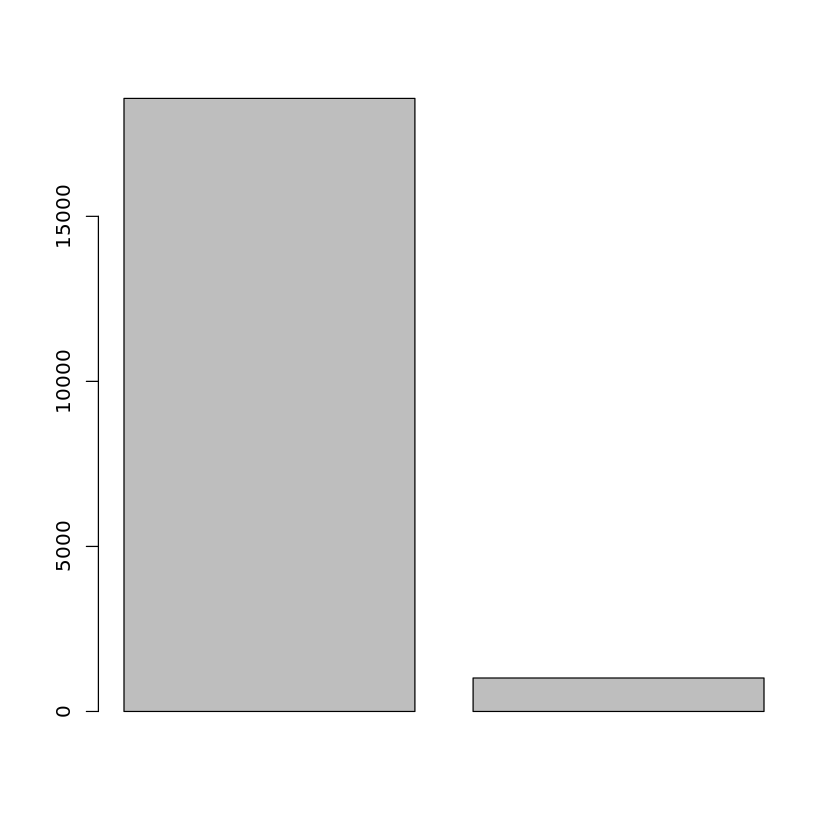

In [20]:
##
## Gráfico
##
result <- DBI::dbGetQuery(sc, "
SELECT 
    UniqueCarrier, 
    SUM(IsDelayed) AS NumDelays 
FROM 
    flights_mutated
GROUP BY 
    UniqueCarrier
")
                  
barplot(result$NumDelays)

In [21]:
##
## Tiempo total de retrasos por transportador
##
DBI::dbGetQuery(sc, "
SELECT 
    UniqueCarrier, 
    SUM(DepDelay) AS TotalTimeDelay 
FROM 
    flights
GROUP BY 
    UniqueCarrier
")

UniqueCarrier TotalTimeDelay
1 WN            978547        
2 XE             47505

In [22]:
##
## Distancia recorrida por operador
##
DBI::dbGetQuery(sc, "
SELECT 
    UniqueCarrier, 
    avg(Distance) AS AvgDistanceTraveled 
FROM 
    flights
GROUP BY 
    UniqueCarrier 
ORDER BY 
    AvgDistanceTraveled DESC
")

UniqueCarrier AvgDistanceTraveled
1 XE            738.0678           
2 WN            623.7927

### Retrasos por día de la semana

In [23]:
DBI::dbGetQuery(sc, "
SELECT 
    DayOfWeek, 
    delayed,
    COUNT(1) AS Count
FROM
    (SELECT
        DayOfWeek,
        IsDelayed AS delayed
     FROM
        flights_mutated)
GROUP BY 
    DayOfWeek, 
    delayed
ORDER BY 
    DayOfWeek
")

DayOfWeek delayed Count
1  1         1        2656
2  1         0       11863
3  2         0       12911
4  2         1        1799
5  3         0       13260
6  3         1        1434
7  4         0       12271
8  4         1        4808
9  5         1        3514
10 5         0       11003
11 6         0        9407
12 6         1        1878
13 7         0        9698
14 7         1        3498

### Retrasos por hora del día

In [24]:
head(
    DBI::dbGetQuery(sc, "
        SELECT 
            Hour,
            delayed, 
            COUNT(1) AS Count
        FROM 
        (
            SELECT
                CAST(CRSDepTime / 100 AS INT) AS Hour, 
                IsDelayed AS delayed
            FROM
                flights_mutated
        )
        GROUP BY 
            Hour, 
            delayed
        ORDER BY 
            Hour"))

Hour delayed Count
1 6    0       6126 
2 6    1        208 
3 7    1        372 
4 7    0       7274 
5 8    1        547 
6 8    0       5956

## Almacenamiento y lectura de tablas calculadas

### Escritura de resultados en el HDFS con formato ORC

In [25]:
##
## Se salva la tabla calculada al directorio tmp del HDFS.
## Primero se borra si existe.
##
systemp('hdfs dfs -rm -r -f /tmp/flightsWithDelays.orc')

## Se salva en formato ORC
spark_write_orc(flightsWithDelays, "/tmp/flightsWithDelays.orc")

Deleted /tmp/flightsWithDelays.orc


In [26]:
##
## Contenido del directorio donde se salvó la tabla
##
systemp('hdfs dfs -ls /tmp/flightsWithDelays.orc')

Found 3 items
-rw-r--r--   1 vagrant supergroup          0 2019-05-21 01:49 /tmp/flightsWithDelays.orc/_SUCCESS
-rw-r--r--   1 vagrant supergroup     165675 2019-05-21 01:49 /tmp/flightsWithDelays.orc/part-00000-d5759437-bd2b-40ff-83b4-a1ebc90a5b71-c000.snappy.orc
-rw-r--r--   1 vagrant supergroup      70799 2019-05-21 01:49 /tmp/flightsWithDelays.orc/part-00001-d5759437-bd2b-40ff-83b4-a1ebc90a5b71-c000.snappy.orc


### Carga de los resultados desde el HDFS

In [27]:
##
## Se lee la tabla calculada desde el HDFS
##
test <- spark_read_orc(sc, "/tmp/flightsWithDelays.orc")
head(test)

# Source: spark<?> [?? x 7]
   Year Month DayofMonth UniqueCarrier FlightNum DepDelay IsDelayed
  <int> <int>      <int> <chr>             <int> <chr>        <dbl>
1  2008     1          3 WN                  335 8                0
2  2008     1          3 WN                 3231 19               1
3  2008     1          3 WN                  448 8                0
4  2008     1          3 WN                 1746 -4               0
5  2008     1          3 WN                 3920 34               1
6  2008     1          3 WN                  378 25               1

### Salva el DataFrame como una tabla permamente

In [28]:
##
## La tabla queda guardada en la carpeta
## spark-warehouse del directorio actual
##

spark_write_table(flightsWithDelays, "flightswithdelaystbl")

### Tablas almacenadas

In [29]:
DBI::dbGetQuery(sc, "SHOW TABLES")

database tableName                 isTemporary
1 default  flightswithdelaystbl      FALSE      
2          flights                    TRUE      
3          flights_mutated            TRUE      
4          flightswithdelays          TRUE      
5          sparklyr_tmp_22401ab35f8f  TRUE      
6          sparklyr_tmp_22407ea974e6  TRUE

## Consultas en un tabla permanente

In [30]:
## 
## Note que cuando la tabla está almacenada de forma
## permanente no es necesario cargarla a la memoria
## para poder usarla.
##
DBI::dbGetQuery(sc, "SELECT COUNT(1) AS Total from flightswithdelaystbl")

Total
1 1e+05

In [31]:
## Se borran las tablas para limpiar el área
## de trabajo.
DBI::dbGetQuery(sc, "DROP TABLE flightswithdelaystbl")
DBI::dbGetQuery(sc, "DROP TABLE flights_mutated")
collect(DBI::dbGetQuery(sc, "SHOW TABLES"))

database tableName                 isTemporary
1          flights                   TRUE       
2          flightswithdelays         TRUE       
3          sparklyr_tmp_22401ab35f8f TRUE       
4          sparklyr_tmp_22407ea974e6 TRUE

---

**Limpieza**

In [32]:
systemp('hdfs dfs -rm /tmp/flights.csv')

Deleted /tmp/flights.csv
